In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

from scipy import signal

from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis import detect_peaks
from kid_readout.analysis.resonator import find_resonators, lmfit_resonator

In [2]:
plot_directory = '/home/flanigan/temp/'

In [3]:
npd = npy.NumpyDirectory('/data/readout/2017-11-17_153051_scan.npd/')

In [4]:
npd.node_names()

['Scan0',
 'ADCSnap1',
 'ADCSnap2',
 'ADCSnap3',
 'ADCSnap4',
 'ADCSnap5',
 'ADCSnap6',
 'ADCSnap7',
 'ADCSnap8',
 'ADCSnap9',
 'ADCSnap10',
 'ADCSnap11',
 'ADCSnap12',
 'ADCSnap13',
 'ADCSnap14',
 'ADCSnap15',
 'ADCSnap16',
 'ADCSnap17',
 'ADCSnap18',
 'ADCSnap19',
 'ADCSnap20',
 'ADCSnap21',
 'ADCSnap22',
 'ADCSnap23',
 'ADCSnap24',
 'ADCSnap25',
 'ADCSnap26',
 'ADCSnap27',
 'ADCSnap28',
 'ADCSnap29',
 'ADCSnap30',
 'ADCSnap31',
 'ADCSnap32',
 'ADCSnap33',
 'ADCSnap34',
 'ADCSnap35',
 'ADCSnap36',
 'ADCSnap37',
 'ADCSnap38',
 'ADCSnap39',
 'ADCSnap40',
 'ADCSnap41',
 'ADCSnap42',
 'ADCSnap43',
 'ADCSnap44',
 'ADCSnap45',
 'ADCSnap46',
 'ADCSnap47',
 'ADCSnap48',
 'ADCSnap49',
 'ADCSnap50',
 'ADCSnap51',
 'ADCSnap52',
 'ADCSnap53',
 'ADCSnap54',
 'ADCSnap55',
 'ADCSnap56',
 'ADCSnap57',
 'ADCSnap58',
 'ADCSnap59',
 'ADCSnap60',
 'ADCSnap61',
 'ADCSnap62',
 'ADCSnap63',
 'ADCSnap64',
 'ADCSnap65',
 'ADCSnap66',
 'ADCSnap67',
 'ADCSnap68',
 'ADCSnap69',
 'ADCSnap70',
 'ADCSnap71',
 'ADC

# ADCSnap

In [5]:
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(659.0, 680.0),
 (655.0, 651.0),
 (638.0, 712.0),
 (649.0, 696.0),
 (727.0, 778.0),
 (747.0, 803.0),
 (546.0, 602.0),
 (539.0, 619.0),
 (573.0, 687.0),
 (503.0, 617.0),
 (632.0, 716.0),
 (632.0, 685.0),
 (667.0, 712.0),
 (692.0, 713.0),
 (712.0, 752.0),
 (718.0, 673.0),
 (702.0, 647.0),
 (634.0, 601.0),
 (758.0, 705.0),
 (757.0, 685.0),
 (703.0, 666.0),
 (637.0, 630.0),
 (628.0, 591.0),
 (813.0, 833.0),
 (602.0, 615.0),
 (695.0, 640.0),
 (526.0, 567.0),
 (558.0, 574.0),
 (605.0, 621.0),
 (497.0, 509.0),
 (586.0, 579.0),
 (549.0, 497.0),
 (553.0, 531.0),
 (556.0, 544.0),
 (533.0, 533.0),
 (667.0, 660.0),
 (499.0, 483.0),
 (574.0, 537.0),
 (489.0, 458.0),
 (413.0, 406.0),
 (430.0, 417.0),
 (386.0, 392.0),
 (397.0, 436.0),
 (398.0, 437.0),
 (469.0, 478.0),
 (499.0, 539.0),
 (496.0, 498.0),
 (386.0, 402.0),
 (444.0, 495.0),
 (448.0, 469.0),
 (545.0, 567.0),
 (509.0, 481.0),
 (514.0, 557.0),
 (507.0, 501.0),
 (502.0, 490.0),
 (500.0, 468.0),
 (490.0, 492.0),
 (515.0, 507.0),
 (474.0, 455.0

In [7]:
[(snap.x.std(), snap.y.std()) for snap in snaps]

[(93.682246143901708, 98.461369326234092),
 (93.232300492508642, 98.711998051998336),
 (94.289814124800557, 100.45903175748188),
 (95.835335888602629, 102.90432087804231),
 (96.586801654813328, 104.05701923743619),
 (94.967596874598371, 103.22558354668737),
 (91.296855987228255, 101.14381954281713),
 (86.212423236940509, 97.541221624698309),
 (83.657055136646846, 95.882393393684168),
 (85.094870278012863, 97.700857346325108),
 (89.684181294198311, 100.68490350975804),
 (93.833698090041381, 102.43728804988243),
 (99.53890440266396, 104.74000349546989),
 (106.2066432498648, 108.32065162839466),
 (109.61848574517938, 109.44827243522857),
 (110.75120120871743, 108.51720345587053),
 (108.71692412269431, 106.20515472702866),
 (108.31805151647659, 104.68846429636925),
 (106.38255341038793, 102.80495966940441),
 (104.35071481953166, 100.44210993062943),
 (105.74513192588587, 102.67013177217635),
 (103.58219616356021, 101.0301225848881),
 (101.83324866774552, 99.799429623236719),
 (101.44901347

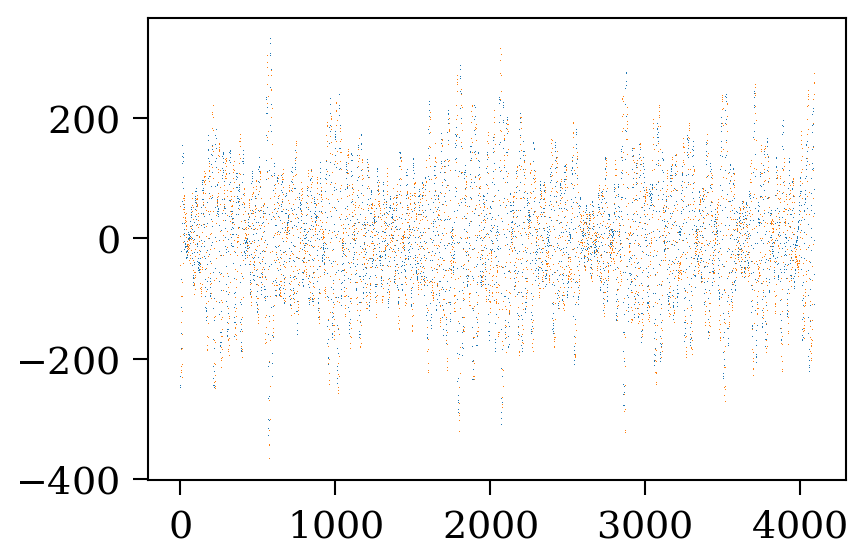

In [8]:
fig, ax = plt.subplots()
ax.plot(snaps[0].x, ',')
ax.plot(snaps[0].y, ',')

# Scan

In [9]:
scan = npd.Scan0
frequency, amplitude, smoothed = scan.stitch()

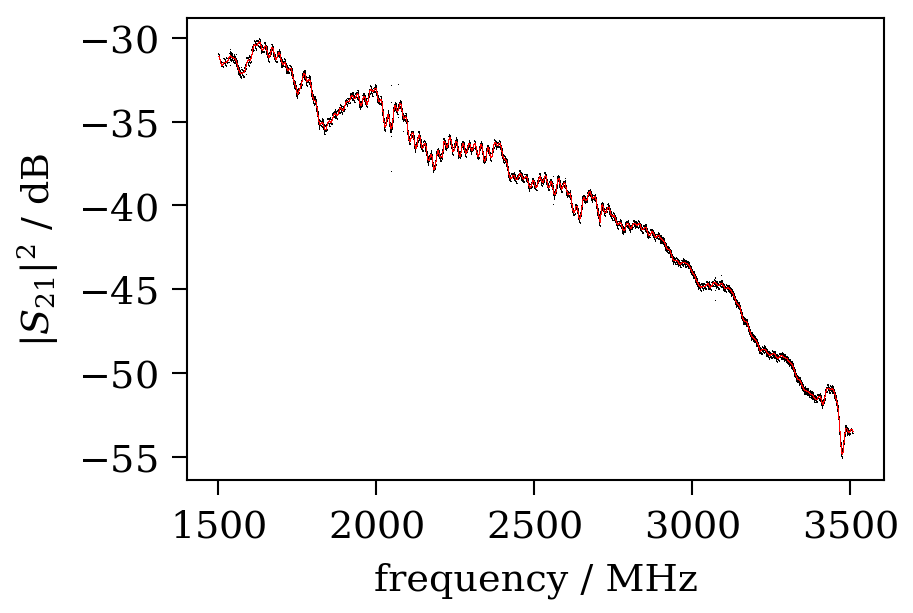

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
for sa in scan.sweep_arrays:
    ax.plot(sa.frequency_MHz, 20 * np.log10(np.abs(sa.s21_point)), ',k')
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r')


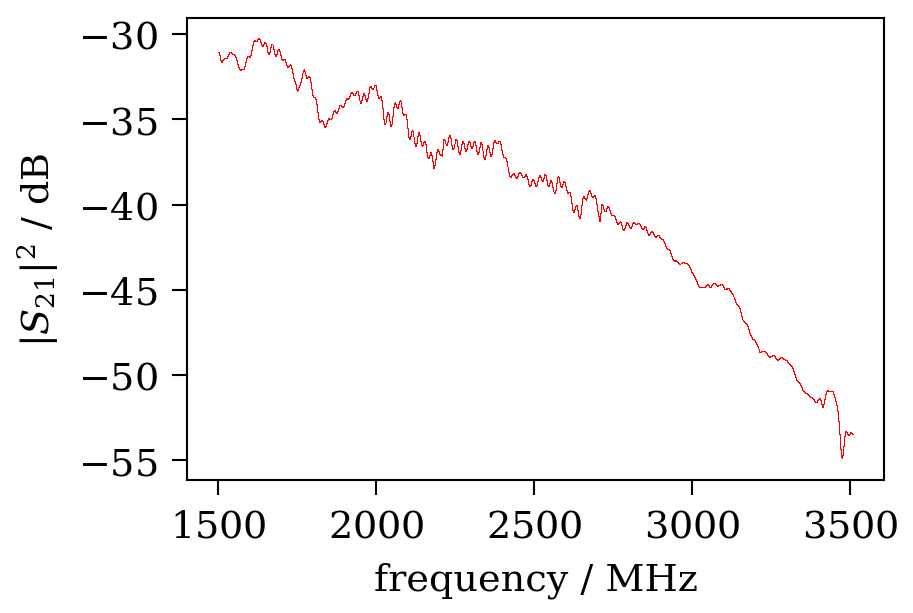

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz', rotation='horizontal')
ax.set_ylabel('$|S_{21}|^2$ / dB', rotation='vertical')
ax.set_yscale('linear')
ax.set_yscale('linear')
ax.plot(1e-6 * frequency, 20 * np.log10(smoothed), ',r')
